In [1]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mpld3
import math 
import os
import glob
from astropy.timeseries import LombScargle
plt.style.use('seaborn-whitegrid')


In [2]:
path = '/home/rosa/Escritorio/datos_tesis/espectros/datos/ciencia1/dat'
os.chdir(path)

In [3]:
path = '/home/rosa/Escritorio/datos_tesis/espectros/datos/ciencia1/dat'
os.chdir(path)
filenames = sorted(glob.glob('*.dat'))
datos = pd.DataFrame()
for i,f in zip(range(0,len(filenames)),filenames):
    if f[0] == 'q':
        if f[3:4]!= '.':
            data=pd.read_csv(f, header=None,delimiter=r"\s+",names = ["λ","flux"])
            datos['λ_'+f[0:1]+f[2:4]], datos['flux_'+f[0:1]+f[2:4]] = data['λ'], data['flux']
        else:
            data=pd.read_csv(f, header=None,delimiter=r"\s+",names = ["λ","flux"])
            datos['λ_'+f[0:1]+f[2:3]], datos['flux_'+f[0:1]+f[2:3]] = data['λ'], data['flux']
    elif f[0] == 'u': 
        if f[3:4]!= '.':
            data=pd.read_csv(f, header=None,delimiter=r"\s+",names = ["λ","flux"])
            datos['λ_'+f[0:1]+f[2:4]], datos['flux_'+f[0:1]+f[2:4]] = data['λ'], data['flux']
        else:
            data=pd.read_csv(f, header=None,delimiter=r"\s+",names = ["λ","flux"])
            datos['λ_'+f[0:1]+f[2:3]], datos['flux_'+f[0:1]+f[2:3]] = data['λ'], data['flux']

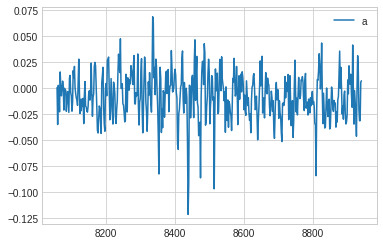

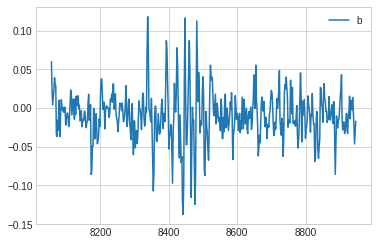

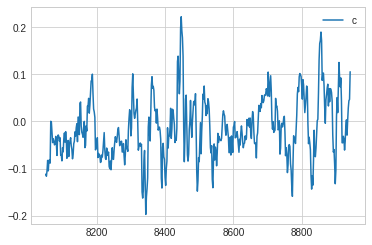

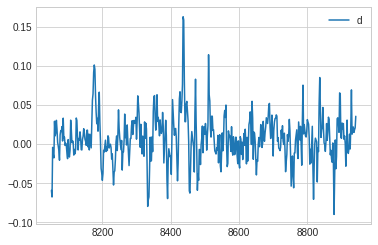

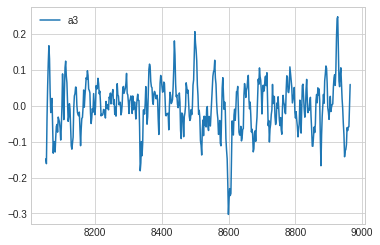

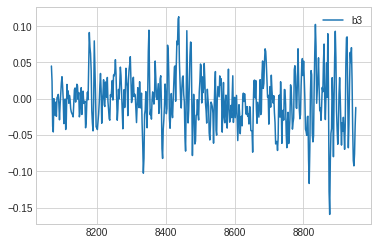

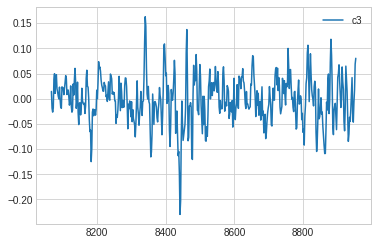

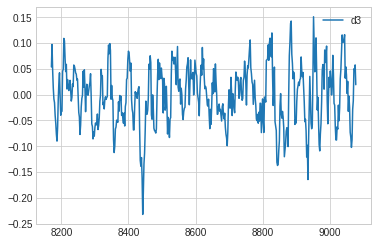

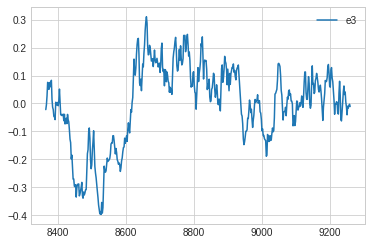

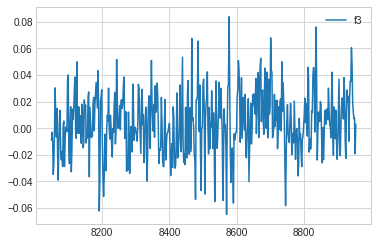

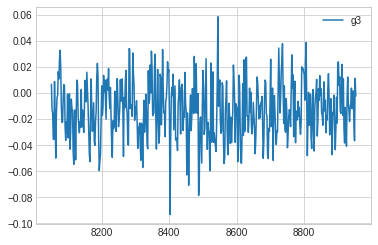

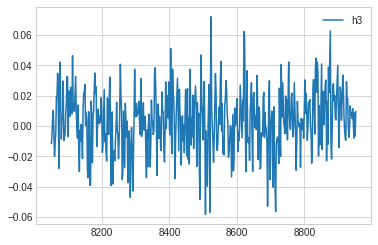

In [61]:
time = [1.999, 2.015, 2.841, ]
filter_col = [col for col in datos if col.startswith('λ')]
letras = ['a','b','c','d','a3','b3','c3','d3','e3','f3','g3','h3']


def delim(rangos,minn,maxx):
    #rangos = 500
    n_bins = (maxx-minn)/rangos
    bins = np.linspace(minn,maxx,int(n_bins))

    low, high = bins[0],bins[1]
    for maxi in bins[1:]:
        df2 = datos.loc[(datos[filter_col] >= low).any(axis=1) & (datos[filter_col] < high).any(axis=1)]
        low = high
        high = maxi
        mean_f = df2.filter(regex='flux').mean(axis=0)
for i in letras:
     plt.plot(df2['λ_q'+i], df2['flux_q'+i], label = i)
     plt.legend(loc= 'best')
     plt.show()

In [62]:
delim(500,5000,9100)

In [37]:
mean_f = df2.filter(regex='flux').mean(axis=0)

flux_qa    -0.007353
flux_qa3   -0.001816
flux_qb    -0.009209
flux_qb3   -0.002249
flux_qc    -0.014998
flux_qc3   -0.002264
flux_qd     0.008054
flux_qd3   -0.001945
flux_qe     0.000280
flux_qe3   -0.002627
flux_qf3    0.004143
flux_qg3   -0.012873
flux_qh3    0.003452
flux_ua    -0.001725
flux_ua3   -0.006417
flux_ub    -0.001079
flux_ub3   -0.001079
flux_uc    -0.000680
flux_uc3   -0.002389
flux_ud    -0.002078
flux_ud3    0.003328
flux_ue     0.005131
flux_ue3    0.003656
flux_uf3    0.000537
flux_ug3   -0.002550
flux_uh3    0.002189
dtype: float64